# CS105/305    Lab 3   -  Pandas on Ice

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

The National Snow and Ice Data Center (https://nsidc.org/) maintains a lot of information about snow and ice.  One of their datasets concerns "sea ice," that is, ice which is floating on some ocean or other seawater body.  Almost all of this is either in the Arctic or Antarctic regions and, as you can imagine, the extent of the ice changes over the course of each year.  It's also changing in longer timeframes and this has attracted quite a lot of attention from climate scientists.  We're going to look at some data on the extent of Arctic ice.  There's a nifty tool for visualizing the data we're going to look at here: https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/

Begin by having a look at https://nsidc.org/data/g02135 and downloading the data file for this lab.  

Load the data into Pandas - you might want to look at some of the options to read_csv()

In [165]:
df = pd.read_csv("N_seaice_extent_daily_v3.0.csv")

Use info() and head() to get a look at the data.  Also look at the columns attribute of your DataFrame.

In [166]:
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.columns)

   Year   Month   Day       Extent      Missing  \
0  YYYY      MM    DD   10^6 sq km   10^6 sq km   
1  1978      10    26       10.231        0.000   
2  1978      10    28       10.420        0.000   
3  1978      10    30       10.557        0.000   
4  1978      11    01       10.670        0.000   

                                         Source Data  
0   Source data product web sites: http://nsidc.o...  
1   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...  
2   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...  
3   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...  
4   ['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14175 entries, 0 to 14174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14175 non-null  object
 1    Month        14175 non-null  object
 2    Day          14175 non-null  object
 3        Extent   14175 non-null  object
 

Find out what years are represented in this dataset.

In [167]:
df.drop(0, inplace=True)
years = set(df['Year'])
years

{'1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022'}

Check the labels on the columns and if they have spaces in them, remove the spaces

In [168]:
df.columns = df.columns.str.replace(' ', "")
df.Month = df.Month.str.replace(' ', "")
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'SourceData'], dtype='object')

Drop the Missing and Source Data columns from the data, leaving the other columns.

In [169]:
df.drop("Missing", axis=1, inplace=True)
df.drop("SourceData", axis=1, inplace=True)

In [170]:
df.columns
df

,Year,Month,Day,Extent
1,1978,10,26,10.231
2,1978,10,28,10.420
3,1978,10,30,10.557
4,1978,11,01,10.670
5,1978,11,03,10.777
...,...,...,...,...
14170,2022,02,19,14.712
14171,2022,02,20,14.729
14172,2022,02,21,14.933
14173,2022,02,22,14.923


In [171]:
df["Date"] = [dt.date(int(Year),int(Month),int(Day)) for Year,Month,Day in zip(df["Year"],df["Month"],df["Day"])]
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Date'], dtype='object')

Build a subset of the data with only rows from 2021

In [172]:
dfNow = df[df["Year"]=="2021"]
dfNow.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Date'], dtype='object')

Plot the Extent column for this subset

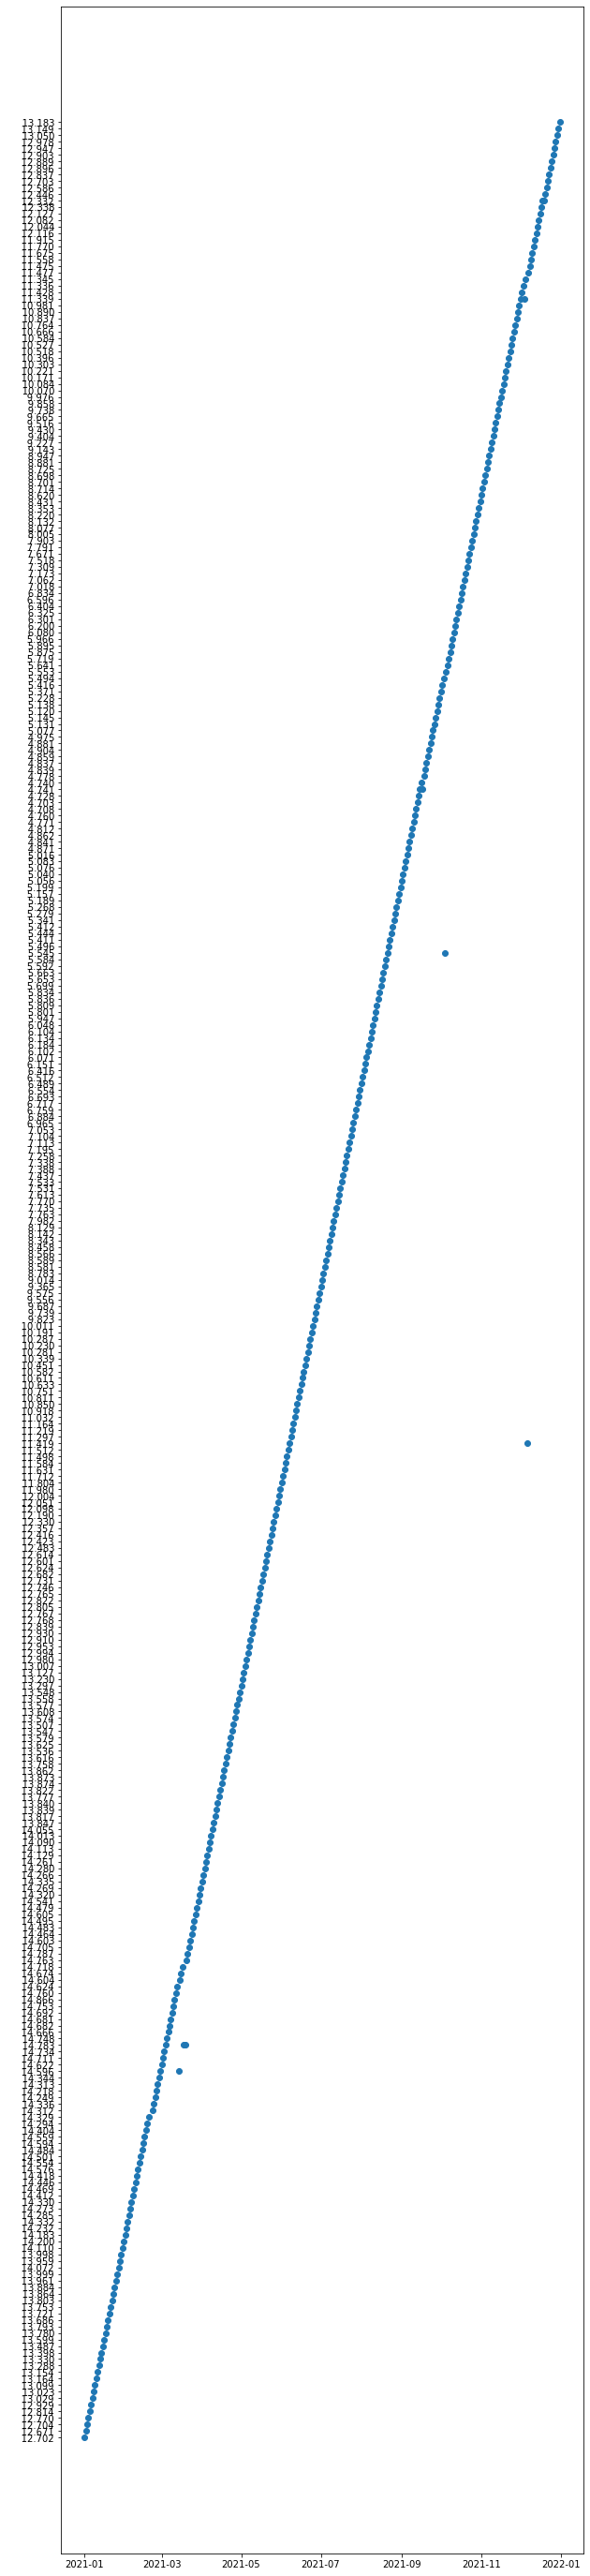

In [179]:
plt.rc('figure', figsize=(10, 50))
plt.scatter(dfNow.Date, dfNow.Extent)

It turns out that the minimum extent is always sometime in September.  Build a version of the dataset with ontly the month of September for each year.

In [174]:
dfSep = df[df.Month == '10']
dfSep

,Year,Month,Day,Extent,Date
1,1978,10,26,10.231,1978-10-26
2,1978,10,28,10.420,1978-10-28
3,1978,10,30,10.557,1978-10-30
171,1979,10,01,7.404,1979-10-01
172,1979,10,03,7.534,1979-10-03
...,...,...,...,...,...
14055,2021,10,27,8.077,2021-10-27
14056,2021,10,28,8.132,2021-10-28
14057,2021,10,29,8.220,2021-10-29
14058,2021,10,30,8.353,2021-10-30


In [175]:

dfnSep = dfSep[dfSep["Year"]=="2021"]
dfnSep

,Year,Month,Day,Extent,Date
14029,2021,10,01,5.371,2021-10-01
14030,2021,10,02,5.416,2021-10-02
14031,2021,10,03,5.494,2021-10-03
14032,2021,10,04,5.545,2021-10-04
14033,2021,10,05,5.553,2021-10-05
14034,2021,10,06,5.641,2021-10-06
14035,2021,10,07,5.719,2021-10-07
14036,2021,10,08,5.875,2021-10-08
14037,2021,10,09,5.895,2021-10-09
14038,2021,10,10,5.966,2021-10-10


Plot just the extent for September in 2021.  You should see that the minimum was on the 13th.  

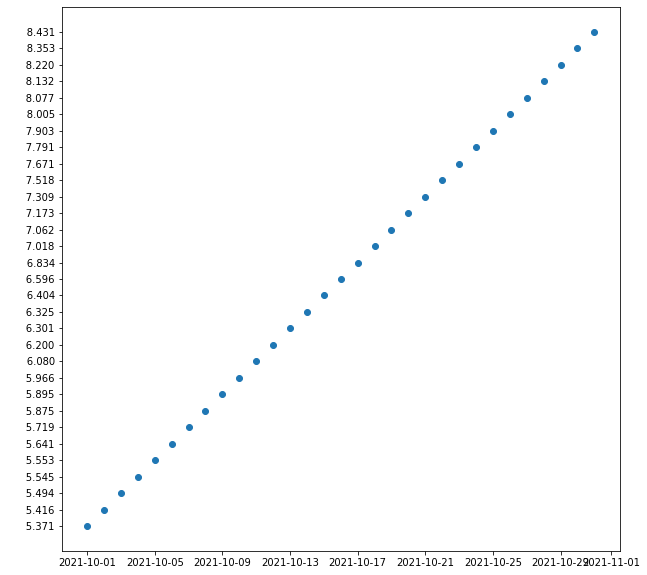

In [180]:
plt.rc('figure', figsize=(10, 10))
plt.scatter(dfnSep.Date,dfnSep.Extent)

For each year, find the day (number starting with 1) of the minimum value.

In [201]:
dfMinExt = pd.DataFrame(columns=df.columns)
i = -1
for Year in years:
    i += 1
    dfTSep = dfSep[dfSep["Year"]==Year]
    if dfTSep.empty:
        continue
    myMin = np.argmin(dfTSep.Extent)
    dfMinExt.loc[i] = dfTSep.iloc[myMin]
dfMinExt

,Year,Month,Day,Extent,Date
0,2005,10,01,5.836,2005-10-01
1,1982,10,01,7.768,1982-10-01
2,1981,10,02,7.987,1981-10-02
3,2009,10,01,5.682,2009-10-01
4,2017,10,01,5.376,2017-10-01
5,1991,10,01,6.850,1991-10-01
6,2007,10,01,4.614,2007-10-01
7,2004,10,01,6.621,2004-10-01
8,1988,10,01,8.069,1988-10-01
9,2003,10,01,6.441,2003-10-01


Create a plot of the minimum day for all the years in the set (skip any year with no September data) 

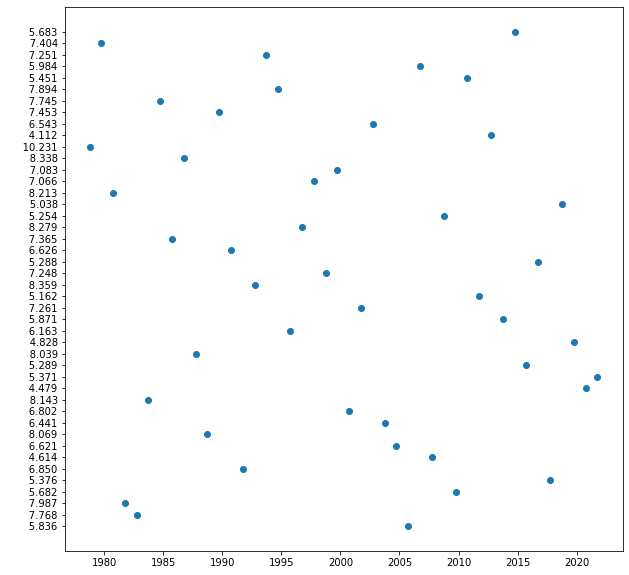

In [202]:
plt.scatter(dfMinExt.Date,dfMinExt.Extent)

Find out which month(s) have had maximum extent values.  

In [203]:
dfMaxExt = pd.DataFrame(columns=df.columns)
i = -1
for Year in years:
    i += 1
    dfT = df[df["Year"]==Year]
    if dfT.empty:
        continue
    myMax = np.argmax(dfTSep.Extent)
    dfMaxExt.loc[i] = dfTSep.iloc[myMin]
dfMaxExt

,Year,Month,Day,Extent,Date
0,2014,10,01,5.683,2014-10-01
1,2014,10,01,5.683,2014-10-01
2,2014,10,01,5.683,2014-10-01
3,2014,10,01,5.683,2014-10-01
4,2014,10,01,5.683,2014-10-01
5,2014,10,01,5.683,2014-10-01
6,2014,10,01,5.683,2014-10-01
7,2014,10,01,5.683,2014-10-01
8,2014,10,01,5.683,2014-10-01
9,2014,10,01,5.683,2014-10-01


For the most common maximum month, repeat the work above and create another plot.

Build a scatter plot of minimum day vs. minimum extent.  Do you see a pattern?

Submit your work as an attachment in email by Friday, March 4th at 11:59PM.  